# **Introduction**

In this study, a neural network model was developed to predict the sale prices of residential properties based on various input features. The model's performance was evaluated using standard regression metrics, including 𝑅2. R 2
score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The results showcase the model's ability to accurately capture the complex relationships between the predictor variables and the target variable. This introduction sets the stage for a comprehensive analysis of the neural network's effectiveness in predicting property sale prices.


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/MyDrive/DataScienceProjects/train.csv'
train_data = pd.read_csv(file)
train_data.head(3)

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
file2 = '/content/drive/MyDrive/DataScienceProjects/train.csv'
test_data = pd.read_csv(file2)
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data = train_data + test_data
data = pd.get_dummies(data)
data = data.drop('Id', axis=1)
data = data.select_dtypes(include=['int64', 'float64'])
data.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,130.0,16900,14,10,4006,4006,392.0,1412,0,...,0,122,0,0,0,0,0,4,4016,417000
1,40,160.0,19200,12,16,3952,3952,0.0,1956,0,...,596,0,0,0,0,0,0,10,4014,363000
2,120,136.0,22500,14,10,4002,4004,324.0,972,0,...,0,84,0,0,0,0,0,18,4016,447000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [10]:
data.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03
mean,113.794521,140.099917,21033.656164,12.198630,11.150685,3942.535616,3969.731507,207.370523,887.279452,93.098630,...,188.489041,93.320548,43.908219,6.819178,30.121918,5.517808,86.978082,12.643836,4015.631507,3.618424e+05
std,84.601142,48.569504,19962.529865,2.765993,2.225599,60.405808,41.290814,362.132413,912.196182,322.638546,...,250.677589,132.512055,122.238297,58.634661,111.514831,80.354614,992.246049,5.407252,2.656190,1.588850e+05
min,40.000000,42.000000,2600.000000,2.000000,2.000000,3744.000000,3900.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4012.000000,6.980000e+04
25%,40.000000,118.000000,15107.000000,10.000000,10.000000,3908.000000,3934.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4014.000000,2.599500e+05
50%,100.000000,138.000000,18957.000000,12.000000,10.000000,3946.000000,3988.000000,0.000000,767.000000,0.000000,...,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,4016.000000,3.260000e+05
75%,140.000000,160.000000,23203.000000,14.000000,12.000000,4000.000000,4008.000000,332.000000,1424.500000,0.000000,...,336.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,4018.000000,4.280000e+05
max,380.000000,626.000000,430490.000000,20.000000,18.000000,4020.000000,4020.000000,3200.000000,11288.000000,2948.000000,...,1714.000000,1094.000000,1104.000000,1016.000000,960.000000,1476.000000,31000.000000,24.000000,4020.000000,1.510000e+06


In [12]:
data = data.fillna(data.mean())

In [13]:
data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [14]:
correlation_matrix = data.corr()
correlation_with_Price = correlation_matrix['SalePrice']
correlated_columns = [col for col in correlation_with_Price.index if correlation_with_Price[col] > 0.5]
correlated_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [15]:
data[correlated_columns].dtypes

OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
SalePrice       int64
dtype: object

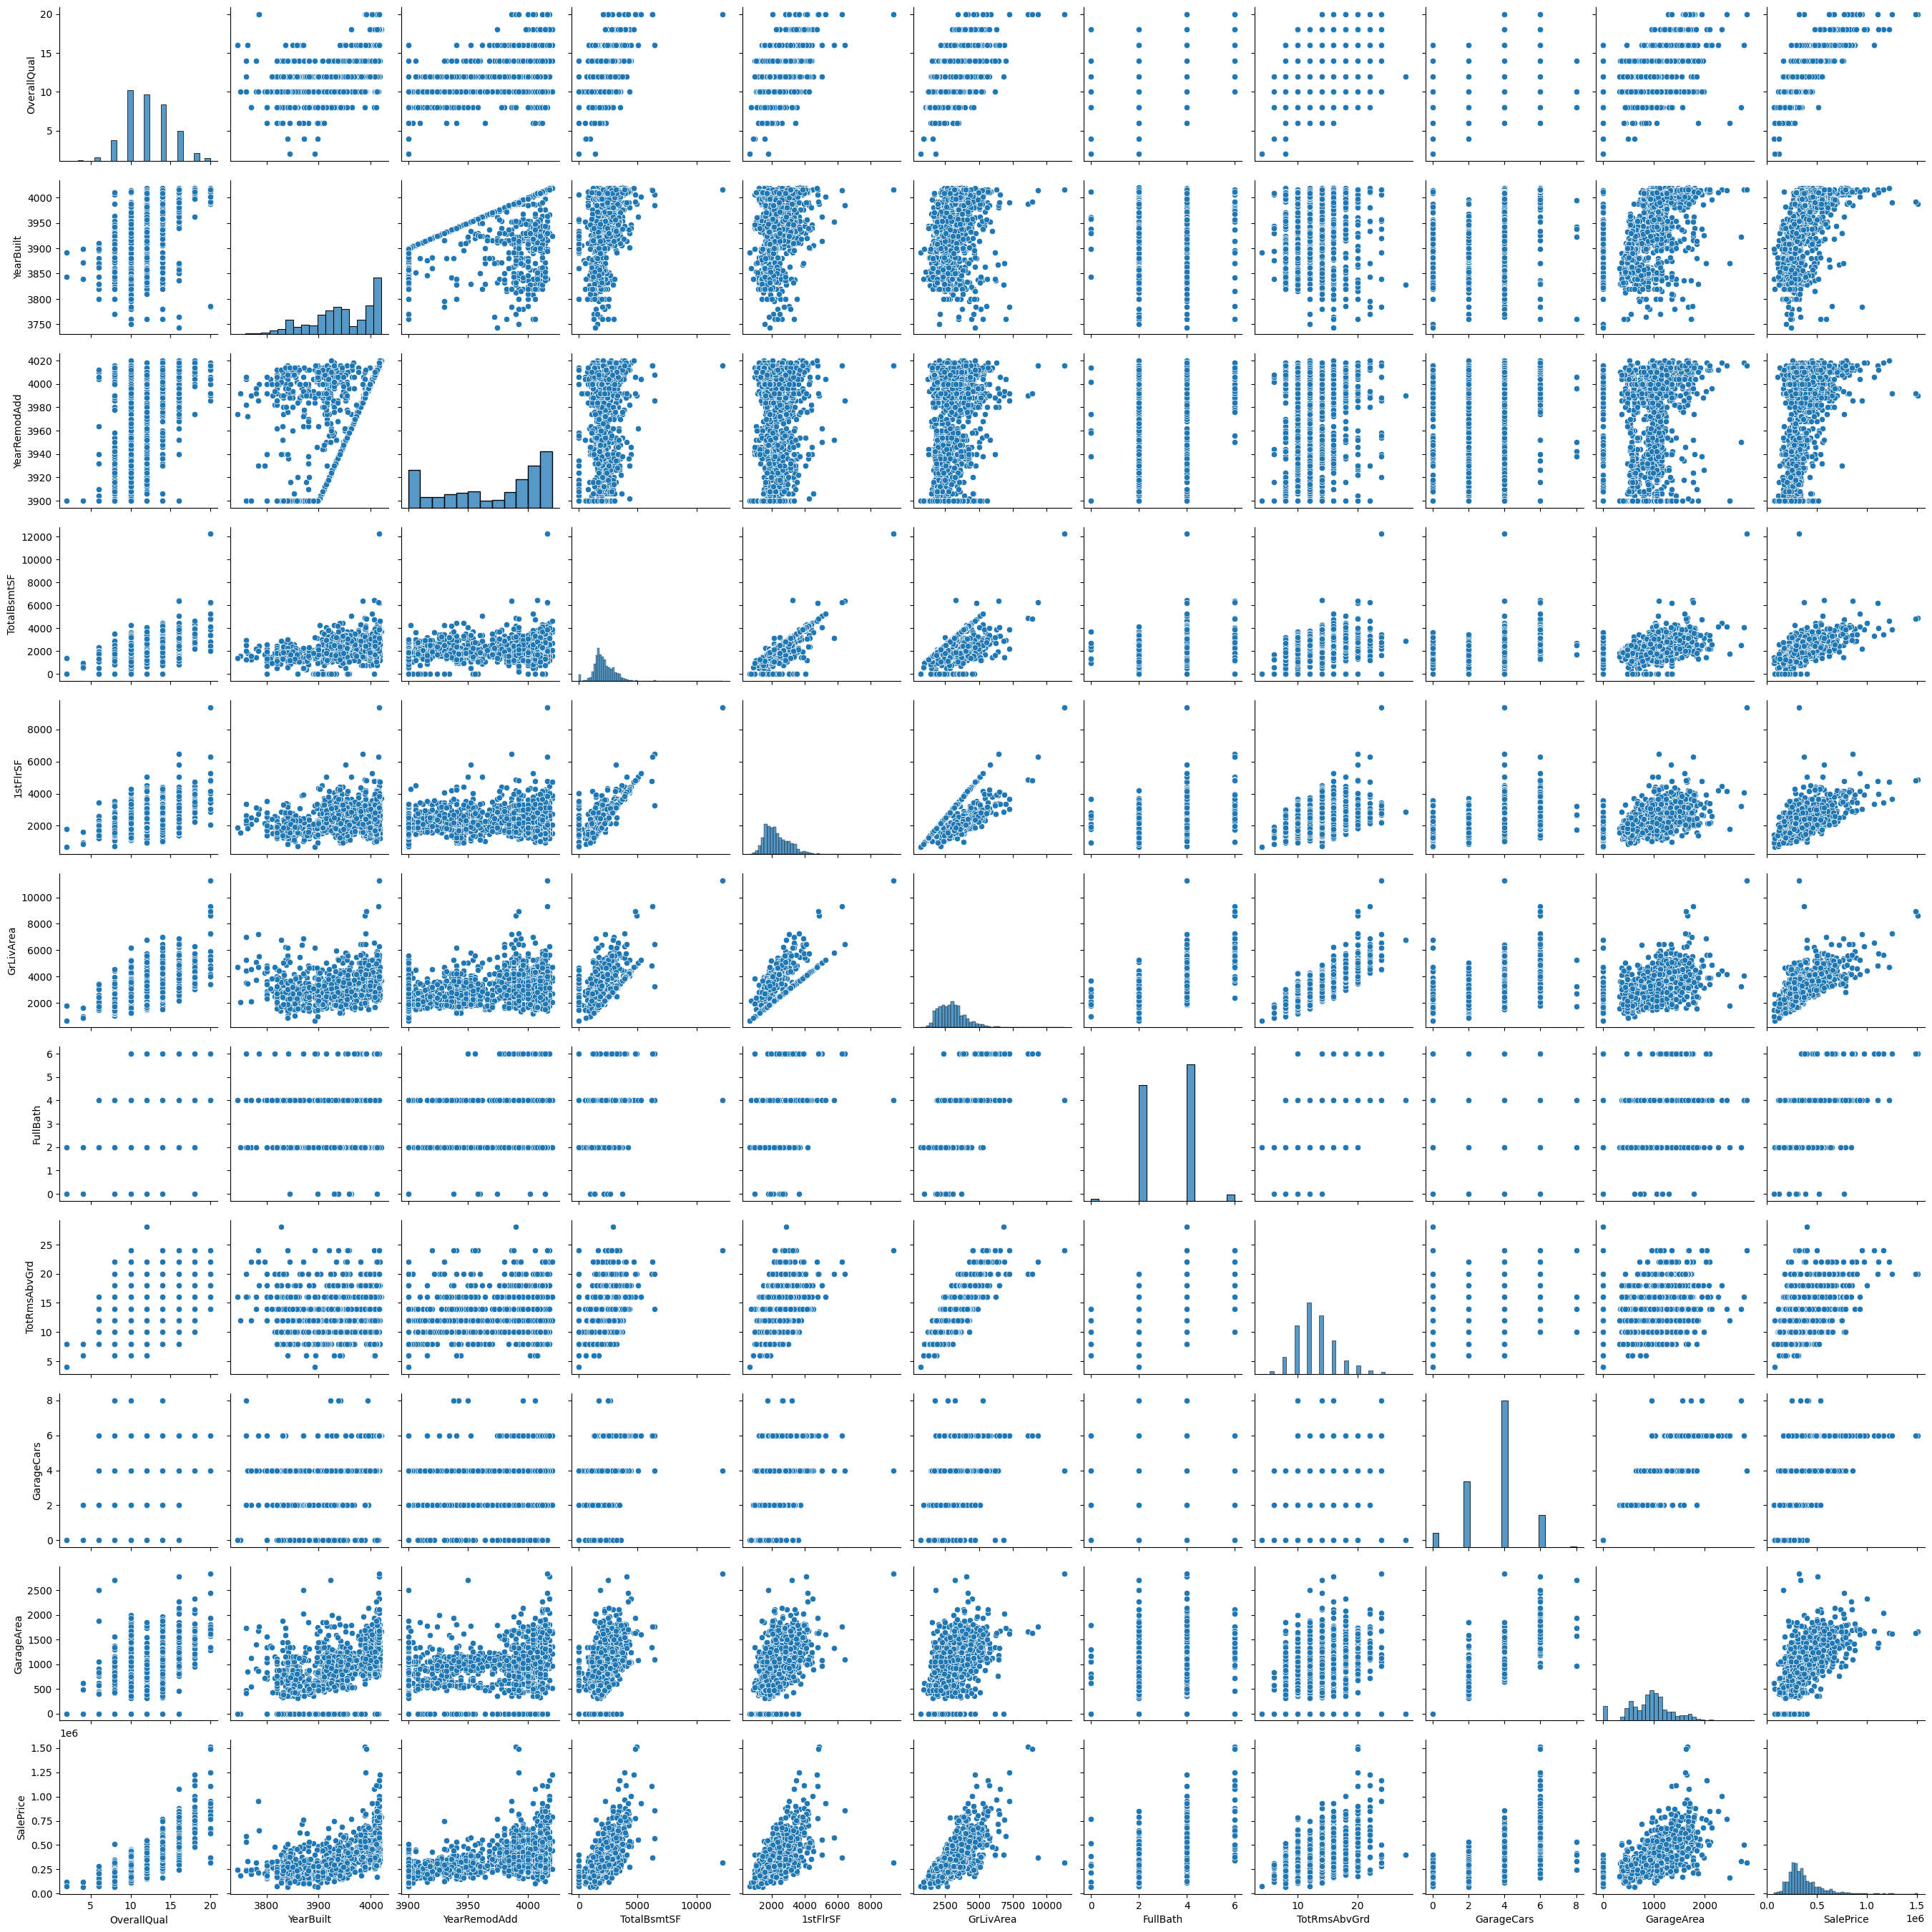

In [16]:
import matplotlib.pyplot as plt
sns.pairplot(data[correlated_columns])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

y = data['SalePrice']
X = data[correlated_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 9.423860170151273e-11
MSE: 1.952164375611174e-20
RMSE: 1.397198760238204e-10


In [20]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,130.0,16900,14,10,4006,4006,392.0,1412,0,...,0,122,0,0,0,0,0,4,4016,417000
1,40,160.0,19200,12,16,3952,3952,0.0,1956,0,...,596,0,0,0,0,0,0,10,4014,363000
2,120,136.0,22500,14,10,4002,4004,324.0,972,0,...,0,84,0,0,0,0,0,18,4016,447000
3,140,120.0,19100,14,10,3830,3940,0.0,432,0,...,0,70,544,0,0,0,0,4,4012,280000
4,120,168.0,28520,16,10,4000,4000,700.0,1310,0,...,384,168,0,0,0,0,0,24,4016,500000


In [21]:
!pip install tensorflow keras --default-timeout=1000

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

neural_model = Sequential()
neural_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
neural_model.add(Dense(32, activation='relu'))
neural_model.add(Dense(16, activation='relu'))
neural_model.add(Dense(1))

neural_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
neural_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
neural_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 1s 5ms/step - loss: 732608.8750 - mean_absolute_error: 666.2286 - val_loss: 506299.9375 - val_mean_absolute_error: 578.6578
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 633407.1250 - mean_absolute_error: 622.7200 - val_loss: 473726.0625 - val_mean_absolute_error: 573.5742
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 593067.3750 - mean_absolute_error: 589.4600 - val_loss: 406593.7812 - val_mean_absolute_error: 523.4091
Epoch 4/50
94/94 [==============================] - 1s 5ms/step - loss: 539344.5625 - mean_absolute_error: 565.1370 - val_loss: 359367.9688 - val_mean_absolute_error: 492.5976
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 469567.4375 - mean_absolute_error: 517.6195 - val_loss: 437541.8750 - val_mean_absolute_error: 578.0302
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 410598.6250 - mean_absolute_error: 497.6110 - va

In [31]:
from sklearn.metrics import r2_score
y_pred = neural_model.predict(X_test)
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

10/10 [==============================] - 0s 3ms/step
R^2: 0.9999998239681305
MAE: 62.417995505136986
MSE: 5400.887450126753
RMSE: 73.49073036871216


In [30]:
data.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,130.0,16900,14,10,4006,4006,392.0,1412,0,...,0,122,0,0,0,0,0,4,4016,417000
1,40,160.0,19200,12,16,3952,3952,0.0,1956,0,...,596,0,0,0,0,0,0,10,4014,363000
2,120,136.0,22500,14,10,4002,4004,324.0,972,0,...,0,84,0,0,0,0,0,18,4016,447000


# **Conclusion**

The neural network model demonstrates exceptional performance, as evidenced by the high 𝑅^2. R^2 score and low Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values. This indicates the model accurately captures the relationship between the input features and the target variable (SalePrice). However, further validation on unseen data and considerations of dataset biases are necessary before deploying the model in real-world scenarios.